<a href="https://colab.research.google.com/github/nmomeni-azan/EE860_Project_Momeni_Project2/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s e

In [1]:
import pycaret
pycaret.__version__

'3.2.0'

In [2]:
from pycaret.datasets import get_data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML_Project/abalone.csv')
data.Sex

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [5]:
from pycaret.classification import *
s = setup(data, target = 'Sex')

,Description,Value
0,Session id,1014
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [6]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)
exp.setup(data, target = 'Sex', session_id = 4806)

,Description,Value
0,Session id,4806
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5597,0.7529,0.5597,0.5494,0.5486,0.3354,0.3390,1.7100
lr,Logistic Regression,0.5519,0.7557,0.5519,0.5414,0.5345,0.3225,0.3291,0.6190
rf,Random Forest Classifier,0.5508,0.7476,0.5508,0.5432,0.5446,0.3241,0.3255,0.9130
ridge,Ridge Classifier,0.5450,0.0000,0.5450,0.5277,0.5249,0.3153,0.3219,0.0370
ada,Ada Boost Classifier,0.5450,0.7250,0.5450,0.5337,0.5277,0.3132,0.3193,0.2790
et,Extra Trees Classifier,0.5426,0.7466,0.5426,0.5327,0.5351,0.3118,0.3133,0.4810
lda,Linear Discriminant Analysis,0.5399,0.7489,0.5399,0.5315,0.5297,0.3053,0.3086,0.0850
knn,K Neighbors Classifier,0.5388,0.7143,0.5388,0.5353,0.5349,0.3090,0.3103,0.0600
xgboost,Extreme Gradient Boosting,0.5357,0.7294,0.5357,0.5299,0.5313,0.3011,0.3021,0.3040
qda,Quadratic Discriminant Analysis,0.5337,0.7389,0.5337,0.5199,0.5037,0.2967,0.3086,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5525,0.7513,0.5525,0.5434,0.5430,0.3241,0.3271,1.8830
lr,Logistic Regression,0.5522,0.7547,0.5522,0.5412,0.5308,0.3220,0.3308,0.1390
lightgbm,Light Gradient Boosting Machine,0.5484,0.7413,0.5484,0.5432,0.5443,0.3199,0.3209,1.3570
xgboost,Extreme Gradient Boosting,0.5453,0.7350,0.5453,0.5427,0.5431,0.3155,0.3161,0.2830
ridge,Ridge Classifier,0.5416,0.0000,0.5416,0.5239,0.5184,0.3091,0.3170,0.0660
rf,Random Forest Classifier,0.5406,0.7432,0.5406,0.5359,0.5370,0.3080,0.3087,0.8200
qda,Quadratic Discriminant Analysis,0.5402,0.7416,0.5402,0.5298,0.5168,0.3153,0.3261,0.0430
lda,Linear Discriminant Analysis,0.5402,0.7479,0.5402,0.5335,0.5300,0.3052,0.3090,0.0440
et,Extra Trees Classifier,0.5320,0.7448,0.5320,0.5248,0.5271,0.2954,0.2962,0.3800
knn,K Neighbors Classifier,0.5275,0.7131,0.5275,0.5260,0.5238,0.2931,0.2949,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4806, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
automl()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1014, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

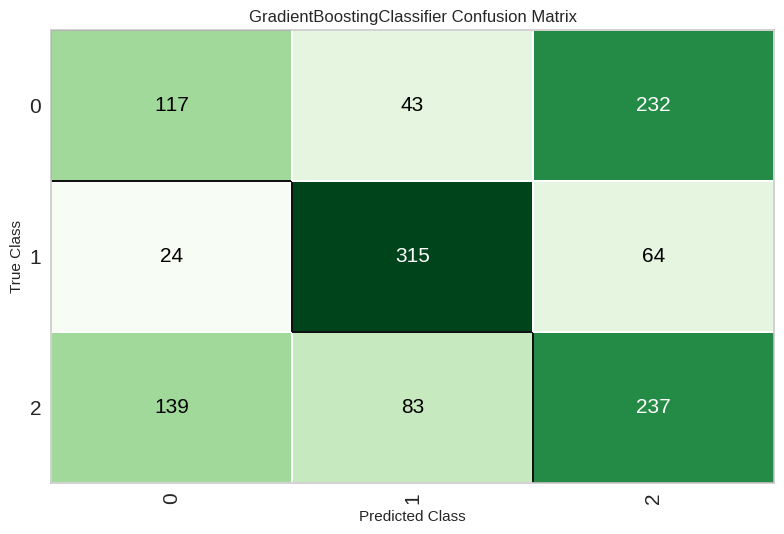

In [10]:
plot_model(best, plot = 'confusion_matrix')

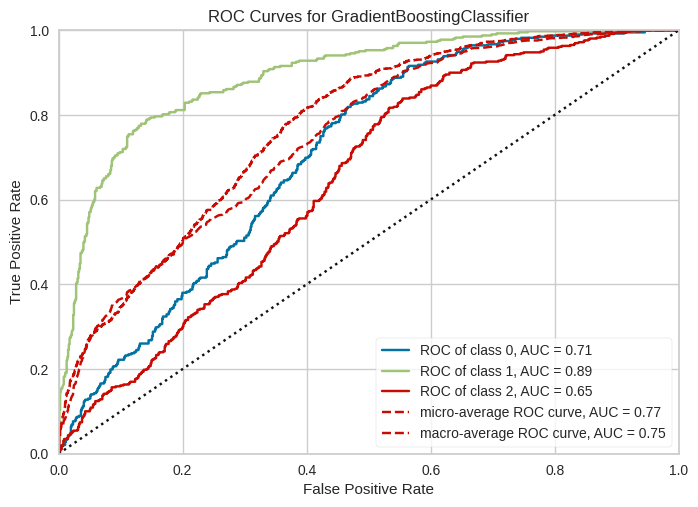

In [11]:
plot_model(best, plot = 'auc')

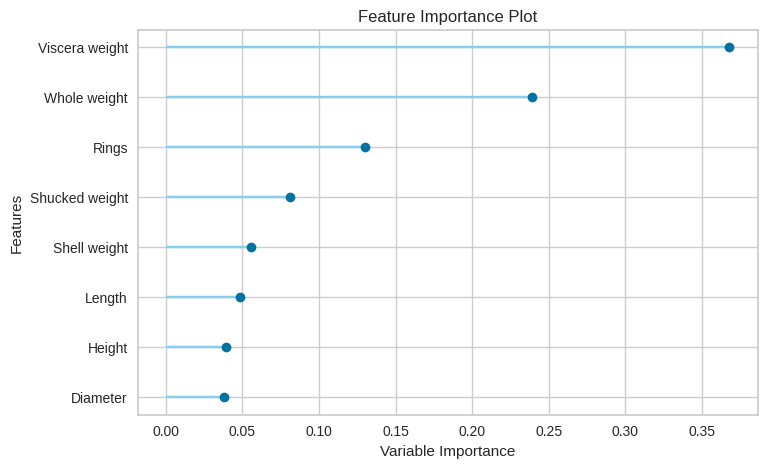

In [12]:
plot_model(best, plot = 'feature')

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5335,0.7439,0.5335,0.5229,0.5236,0.2949,0.2977


In [17]:
holdout_pred.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,prediction_label,prediction_score
3014,0.395,0.300,0.090,0.2530,0.1155,0.0500,0.075,6,I,I,0.9058
2070,0.550,0.420,0.115,0.6680,0.2925,0.1370,0.209,11,I,I,0.5930
208,0.525,0.415,0.170,0.8325,0.2755,0.1685,0.310,13,F,F,0.4618
984,0.570,0.450,0.155,1.1950,0.5625,0.2565,0.295,10,M,M,0.6141
3328,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.275,13,I,F,0.5384


In [18]:
new_data = data.copy()
new_data.drop('Sex', axis=1, inplace=True)
new_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,0.4374
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,I,0.7369
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,I,0.6263
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M,0.3745
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,0.8045


In [20]:
save_model(best, 'my_first_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole weight', 'Shucked weight',
                                              'Viscera weight', 'Shell weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=Non

In [21]:
loaded_best_pipeline = load_model('/content/my_first_pipline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole weight', 'Shucked weight',
                                             'Viscera weight', 'Shell weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_i...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=1014, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)